Preprocessing the data

In [2]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-20 15:27:12.851580: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Load the data

In [3]:
#load data and metadata of fashion mnist from tensorflow datasets 
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Preprocess the data

In [4]:
#Define the train data
train_data = []

IMG_SIZE = 28

for i, (image, label) in enumerate(data['train']):
    image = cv2.resize(image.numpy(), (IMG_SIZE, IMG_SIZE))
    image = image.reshape(IMG_SIZE, IMG_SIZE, 1)
    train_data.append([image, label])

train_data[0]

2023-05-20 15:27:21.619436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-05-20 15:27:21.620326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


[array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
  

In [5]:
#Set inputs and tragets 
x = [] #Inputs
y = [] #Targets

for image, label in train_data:
    x.append(image)
    y.append(label)

#Scale inputs
x = np.array(x).astype(float) / 255

#transform targets in an array
y = np.array(y)

In [6]:
#Generate more images from the originals
data_gen = ImageDataGenerator(
    rotation_range=30, #randomly rotate images in a range of -30 degrees to +30 degrees.
    width_shift_range=0.2, #random translations in the width of the images by 20%
    height_shift_range=0.2, #random translations in the height of the images by 20%
    shear_range=15, #random deformations in a range of -15 degrees to +15 degrees
    zoom_range=[0.7, 1.4], #Images can be enlarged or reduced in a range from 70% to 140% of their original size.
    horizontal_flip=True, #random horizontal flips on images
    vertical_flip=True, #random vertical flips on images
) 

#Generate the new images
data_gen.fit(x)

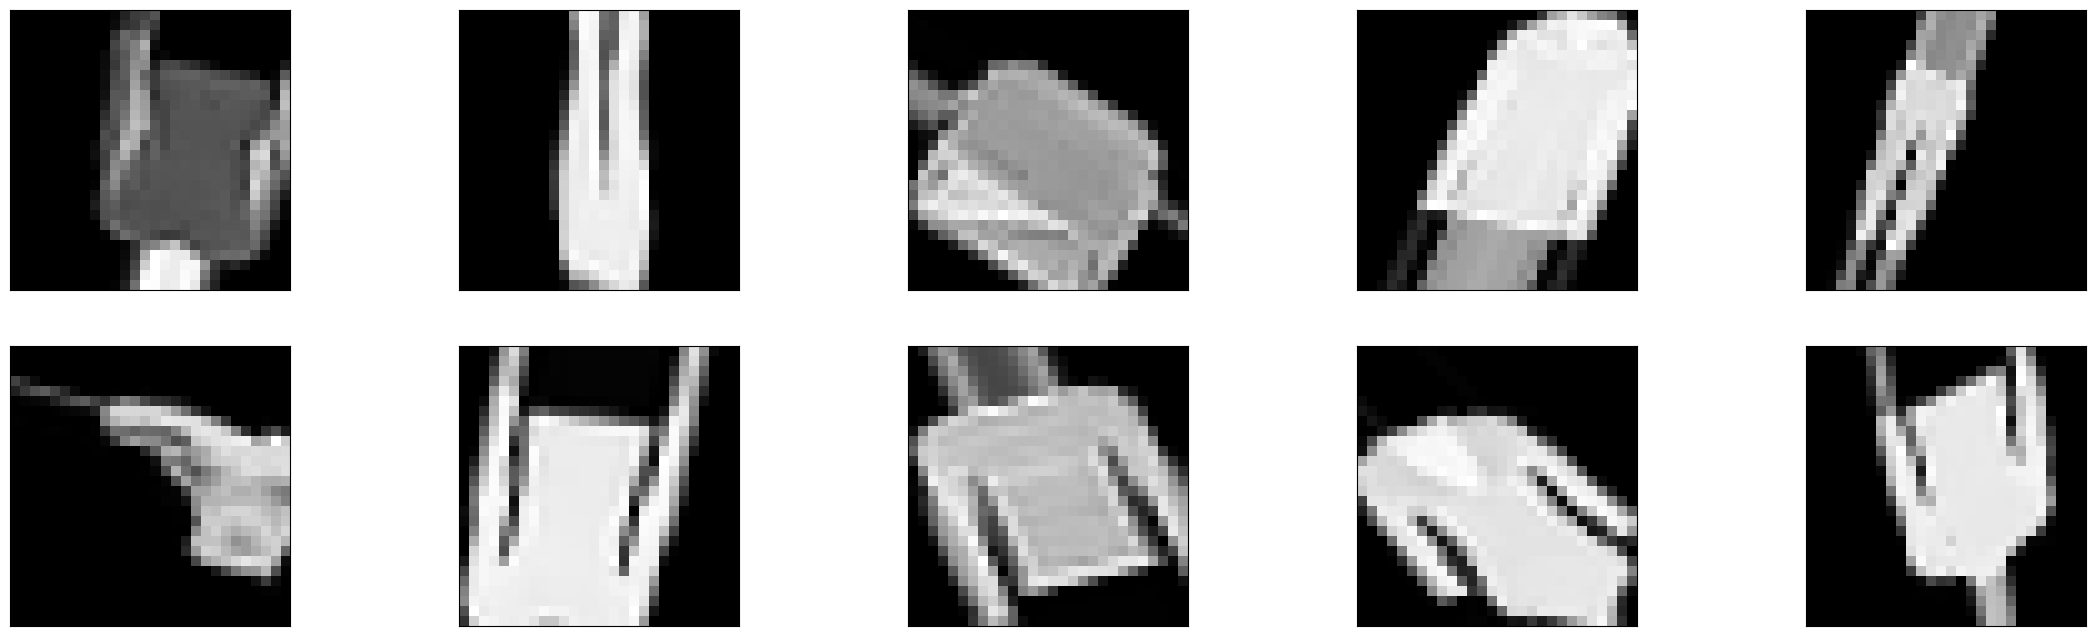

In [7]:
#Show some genetated images
plt.figure(figsize=(28,8))

for image, label in data_gen.flow(x, y, batch_size=10, shuffle=False):
    for i in range(10):
        plt.subplot(2,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(image[i].reshape(28,28), cmap='gray')
    break

In [8]:
#Split the dataset into train and validation
sample = int(len(x) * .85)

x_train = x[:sample]
x_validation = x[sample:]

y_train = y[:sample]
y_validation = y[sample:]

In [9]:
gen_data_train = data_gen.flow(x_train, y_train, batch_size=32)

In [10]:
#Define test data
test_data = []

IMG_SIZE = 28

for i, (image, label) in enumerate(data['test']):
    image = cv2.resize(image.numpy(), (IMG_SIZE, IMG_SIZE))
    image = image.reshape(IMG_SIZE, IMG_SIZE, 1)
    test_data.append([image, label])

#Set inputs and tragets 
x_test = [] #Inputs test
y_test = [] #Targets test

for image, label in test_data:
    x_test.append(image)
    y_test.append(label)

#Scale inputs
x_test = np.array(x_test).astype(float) / 255

#transform targets in an array
y_test = np.array(y_test)

2023-05-20 15:27:46.438404: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-05-20 15:27:46.438845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]


Save the data

In [11]:
np.savez('../data/preprocessed/data_train', inputs=gen_data_train.x, targets=gen_data_train.y)
np.savez('../data/preprocessed/data_validation', inputs=x_validation, targets=y_validation)
np.savez('../data/preprocessed/data_test', inputs=x_test, targets=y_test)